# NN 1 ("Einer gegen Alle")

In [1]:
import numpy as np
from numpy import load
#from scipy.special import expit
from sklearn.preprocessing import OneHotEncoder
import pickle
import matplotlib.pyplot as plt

In diesem Kapitel wird ein Neuronales Netz erstellt, welches entscheiden kann ob ein bestimmtes Objekt auf dem Bild zu sehen ist oder etwas anderes. Dieses Netz kann also erstmal nur eine Gruppe z.B. Sechskantschraube von allen anderen unterscheiden.

Wir werden 28x28 Pixel große Bilder von Schraubenköpfen verwenden.

In [2]:
#import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2021-11-23 02:57:01.222794: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-23 02:57:01.222817: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Datensatz laden

In [29]:
X_train = load('Dataset/X_train.npy').astype(np.float32).reshape(-1, 784)*1.0/255.0
y_train = load('Dataset/y_train.npy').astype(np.int32)

X_test=load('Dataset/X_test.npy').astype(np.float32).reshape(-1, 784)*1.0/255.0
y_test=load('Dataset/y_test.npy').astype(np.int32)

y_train_A = y_train == 3 #sechskant soll erkannt werden
y_train_B = y_train == 2 #pozidriv soll erkannt werden

In [30]:
X_train.shape

(10500, 784)

False


<function matplotlib.pyplot.show(close=None, block=None)>

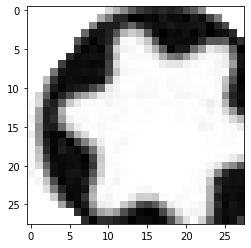

In [32]:
i=0
print(y_train_A[i])
#print(X_train[i].reshape(28,28))
plt.imshow(X_train[i].reshape(28,28)*255.0,cmap='gray',vmin=0,vmax=255)
plt.show
# 0: innensechskant
# 1: philips
# 2: pozidriv
# 3: sechskant
# 4: torx

## Neuronales Netz A (Sechskant)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(16, activation="sigmoid", input_shape=(784,)))
model.add(Dense(1, activation="sigmoid"))

#sgd = stochastic gradient descent
model.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy"])


#####################
model.fit(
    X_train,
    y_train_A,
    epochs=20,
    batch_size=500)

Epoch 1/20
21/21 [==============================] - 0s 1ms/step - loss: 0.4978 - accuracy: 0.8026
Epoch 2/20
21/21 [==============================] - 0s 2ms/step - loss: 0.4226 - accuracy: 0.8026
Epoch 3/20
21/21 [==============================] - 0s 1ms/step - loss: 0.3836 - accuracy: 0.8026
Epoch 4/20
21/21 [==============================] - 0s 1ms/step - loss: 0.3503 - accuracy: 0.8026
Epoch 5/20
21/21 [==============================] - 0s 1ms/step - loss: 0.3211 - accuracy: 0.8026
Epoch 6/20
21/21 [==============================] - 0s 1ms/step - loss: 0.2956 - accuracy: 0.8026
Epoch 7/20
21/21 [==============================] - 0s 1ms/step - loss: 0.2735 - accuracy: 0.8027
Epoch 8/20
21/21 [==============================] - 0s 1ms/step - loss: 0.2541 - accuracy: 0.8215
Epoch 9/20
21/21 [==============================] - 0s 1ms/step - loss: 0.2371 - accuracy: 0.8769
Epoch 10/20
21/21 [==============================] - 0s 1ms/step - loss: 0.2219 - accuracy: 0.9312
Epoch 11/20
21/21 [

## Neuronales Netz B (Pozidriv)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(16, activation="sigmoid", input_shape=(784,)))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy"])

#################
model.fit(
    X_train,
    y_train_B,
    epochs=10,
    batch_size=500)

Epoch 1/10
21/21 [==============================] - 0s 1ms/step - loss: 0.5795 - accuracy: 0.7720
Epoch 2/10
21/21 [==============================] - 0s 1ms/step - loss: 0.5262 - accuracy: 0.7957
Epoch 3/10
21/21 [==============================] - 0s 2ms/step - loss: 0.5087 - accuracy: 0.7957
Epoch 4/10
21/21 [==============================] - 0s 1ms/step - loss: 0.4941 - accuracy: 0.7957
Epoch 5/10
21/21 [==============================] - 0s 1ms/step - loss: 0.4807 - accuracy: 0.7957
Epoch 6/10
21/21 [==============================] - 0s 2ms/step - loss: 0.4685 - accuracy: 0.7957
Epoch 7/10
21/21 [==============================] - 0s 2ms/step - loss: 0.4577 - accuracy: 0.7957
Epoch 8/10
21/21 [==============================] - 0s 2ms/step - loss: 0.4480 - accuracy: 0.7957
Epoch 9/10
21/21 [==============================] - 0s 2ms/step - loss: 0.4393 - accuracy: 0.7957
Epoch 10/10
21/21 [==============================] - 0s 1ms/step - loss: 0.4316 - accuracy: 0.7957


In [28]:
model.evaluate(X_train.reshape(10500, 784), y_train)

329/329 [==============================] - 0s 501us/step - loss: 0.1408 - accuracy: 1.0000


[0.14078864455223083, 1.0]

In [ ]:
model.evaluate?

In [ ]:
print(model.metrics_names)